# 4. Object Oriented Programming

In [5]:
x = [1, 5, 4]
x.sort()
x.__class__
# View all the attributes of x. 
#
# dir(x)     

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

### (1) Defining Classes

In [10]:
class Consumer:
    pass     # Empty code block
c1 = Consumer()
c1.wealth = 10    # Attach new attributes
print(c1.wealth)    

10


In [12]:
class Consumer:
    
    def __init__(self, w):    # Constructor method
        "Initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y
    
    def spend(self, x):
        "The consumer spends x dollars"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficient funds")
        else:
            self.wealth = new_wealth

In [14]:
c1 = Consumer(10)
c1.spend(5)
c1.wealth

5

In [15]:
c1.earn(15)
c1.spend(100)

Insufficient funds


In [18]:
c1.__dict__

{'wealth': 20}

In [19]:
c2 = Consumer(20)
c2.__dict__

{'wealth': 20}

In [21]:
Consumer.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'Consumer' objects>,
              '__doc__': None,
              '__init__': <function __main__.Consumer.__init__>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Consumer' objects>,
              'earn': <function __main__.Consumer.earn>,
              'spend': <function __main__.Consumer.spend>})

### (2) Example: Solow Model

In [33]:
"""
Filename: solow.py
Reference: http://quant-econ.net/py/python_oop.html
"""
import numpy as np
class Solow:    # docstring里的这个r可以让backslash正常显示
    r"""    
    Implements the Solow growth model with update rule

    .. math::
        k_{t+1} = \frac{s z k^{\alpha}_t}{1 + n}  + k_t \frac{1 - d}{1 + n}
    
    """
    def __init__(self, n, s, d, alpha, z, k):    # 创建实例的时候需要哪些属性
        """ 
        Solow growth model with Cobb Douglas production function.  All
        parameters are scalars.  See http://quant-econ.net/py/python_oop.html
        for interpretation.
        """
        self.n, self.s, self.d, self.alpha, self.z = n, s, d, alpha, z    # 简便的赋值方法
        self.k = k
        

    def h(self):    # 计算K_t+1
        "Evaluate the h function"
        temp = self.s * self.z * self.k**self.alpha + self.k * (1 - self.d)
        return temp / (1 + self.n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()
        
    def steady_state(self):
         "Compute the steady state value of capital."
         return ((self.s * self.z) / (self.n + self.d))**(1 / (1 - self.alpha))
     
    def generate_sequence(self, t):    # 厉害了
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

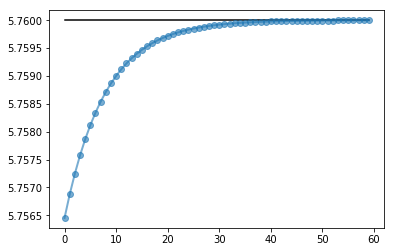

In [69]:
import matplotlib.pyplot as plt
china = Solow(0.05, 0.3, 0.2,0.5, 2, 1)
china.steady_state()
T = 60
fig, ax = plt.subplots()
ax.plot([china.steady_state()]*T, 'k-', label = 'steadystate')
# 上一行的中括号很重要， 生成一个长度为60的List
ax.plot(China.generate_sequence(T), 'o-', lw = 2, alpha = 0.6, label = 'China')
plt.show()

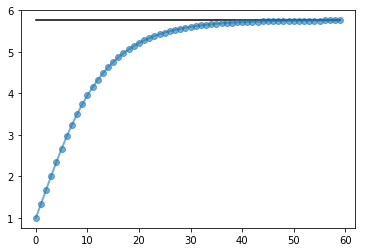

### (3) Example: A Market

In [57]:
"""
Filename: market.py
Reference: http://quant-econ.net/py/python_oop.html
"""

from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        http://quant-econ.net/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')    # 关于 Error
        
    def price(self):
        "Return equilibrium price"
        return  (self.ad - self.az + self.bz*self.tax)/(self.bd + self.bz)    # 需先解出式子
    
    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()    # 好方便啊
        
    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad/self.bd) - (1/self.bd)* x
        area, error = quad(integrand, 0, self.quantity())    #这个error是干嘛的？
        return area - self.price() * self.quantity()
    
    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az/self.bz) + (1/self.bz) * x
        area, error = quad(integrand, 0, self.quantity())    # 从0到均衡产出
        return (self.price() - self.tax) * self.quantity() - area
    
    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()
        
    def inverse_demand(self,x):    # 给定一个需求， 算这一点上的价格
        "Compute inverse demand"
        return self.ad/self.bd - (1/self.bd)* x    # p = ad/bd - q/bd
    
    def inverse_supply(self,x):
        "Compute inverse supply curve"
        return -(self.az/self.bz) + (1/self.bz) * x + self.tax
    
    def inverse_supply_no_tax(self,x):
        "Compute inverse supply curve without tax"
        return -(self.az/self.bz) + (1/self.bz) * x

In [59]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)   
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()  
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [60]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)

1.125

### (4) Example: Chaos

It is interesting to see the results generated by the chaos model, but one needs to go through the math details to know what exactly going on behind the scene. 

Why does adding an exogenous random variable make the model become a failure?

In [155]:
import numpy as np

class chaos:
    
    def __init__(self, r, x0):
        """
        Generate time series from the chaos model.
    
        """        
        self.r, self.x = r, x0
        if r < 0 or r > 4:
            raise ValueError('Value of r out of bound.')
        elif x0 < 0 or x0 > 1:
            raise ValueError('Value of x0 out of bound.')
    
    def y(self):
        "Calculate x_t+1"
        temp = self.r * self.x * (1 - self.x)
        return temp    # 这里不要写成self.y
    
    def update(self):
        "Update the path"
        self.x = self.y()    # 记得加括号
        
    def series_gen(self, T):
        "Generate series of length T"
        path = []
        for i in range(T):
            path.append(self.x)
            self.update()
        return path

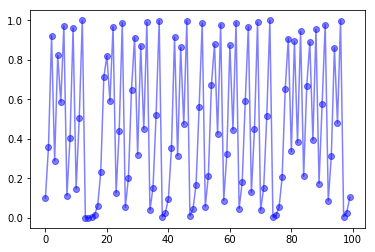

In [157]:
universe = chaos(4, 0.1)
ch = universe.series_gen(100)
ch
fig, ax = plt.subplots()
ax.plot(range(100), ch, 'bo-', alpha = 0.5)
plt.show()

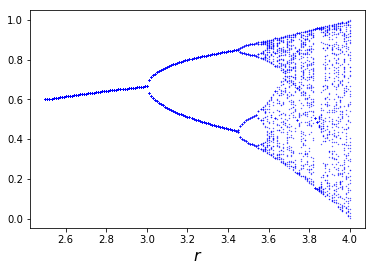

In [158]:
fig, ax = plt.subplots()
ch = chaos(4, 0.1)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.series_gen(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.01

ax.set_xlabel(r'$r$', fontsize=16)
plt.show()

### (5) Special Methods

In [166]:
class Foo:

    def __len__(self):
        return 12

    def __call__(self, x):
        return x + 42

# Give the instance a length    
f = Foo()
len(f)

12

In [167]:
# Make the instance callable.
f(8)

50

### (6) Exercises

#### Q1. ECDF

In [194]:
# 1 ECDF
class ECDF:
    def __init__(self, data):
        """
        Data for computing the empirical cumulative distribution function.
        
        """
        self.observations = data
    
    def __call__(self, x):
        "Returns the ECDF."
        n = len(self.observations)
        count = 0
        for i in range(n):
            if self.observations[i] <= x:
                count += 1
        return count/n    

In [195]:
samples = [np.random.uniform(0, 1) for i in range(1000)]
F = ECDF(samples)
F(0.5)

0.498

In [185]:
len(F.observations)

10

#### Q2. Polynomial

In [254]:
class Polynomial:
    
    def __init__(self, coef):
        """Evaluate and differentiate polynomials."""
        if type(coef) is list:
            self.coef = coef
        else:
            raise TypeError('Please input a list as the coefficients.')
               
    def __call__(self, x):
        return sum(coef * x ** index for index, coef in enumerate(self.coef))
    
    def differentiate(self):
        del self.coef[0]

In [256]:
Poly = Polynomial([1,1,1])
Poly(1)

3

In [248]:
Poly.differentiate()
Poly(1)

2